# Tampere1

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import math

df1=pd.read_csv('TAMPERE1_training.csv')
#df1
m=list(df1['HEIGHT'])

for i in range(len(m)):
    if m[i] == 3.7:
        m[i]=1
    if m[i] == 7.4:
        m[i]=2
    if m[i] == 11.1:
        m[i]=3

df1['FLOOR']=m
df1.pop('HEIGHT')

#plt.plot(df1['FLOOR'])             

y=df1.iloc[:,-3:-1]
x=df1.iloc[:,:-3]
#x
#y

In [2]:
#df1.shape
#dis={}

In [3]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

svr = SVR(epsilon=0)
multi_op_reg = MultiOutputRegressor(svr)  

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

multi_op_reg.fit(x_train,y_train)
y_pred=multi_op_reg.predict(x_test)

In [4]:
from sklearn.metrics import r2_score,mean_absolute_error
r2 = r2_score(y_test,y_pred)
print('r2 score for the model is', r2)

mae=mean_absolute_error(y_pred,y_test)
print('Mean Absolute Error for the model is', mae)

r2 score for the model is 0.8283110824137958
Mean Absolute Error for the model is 6.638314969126644


In [5]:
distance=[]
actualloc=list(zip(y_test['LATITUDE'],y_test['LONGITUDE']))
predloc=list(zip(y_pred[:,-1],y_pred[:,-2]))
#actualloc
#predloc
for i in range(len(x_test)):
    orig=actualloc[i]
    desti=predloc[i]
    distance.append(math.dist(orig,desti))
#distance

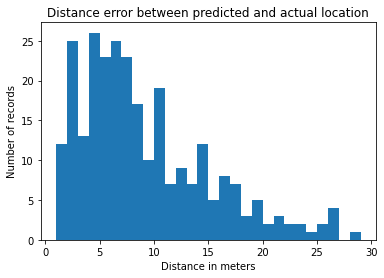

In [6]:
plt.hist(distance,bins=[i for i in range(1,30)])
plt.xlabel('Distance in meters')
plt.title('Distance error between predicted and actual location')
plt.ylabel('Number of records')

plt.savefig('svm_t1.eps',dpi=400)

In [7]:
count=0
for i in range(len(distance)):
    if distance[i]<=10:
        count+=1
print(count,len(distance))

177 296


In [8]:
177/296

0.597972972972973

In [23]:
dis[4]=distance[:]

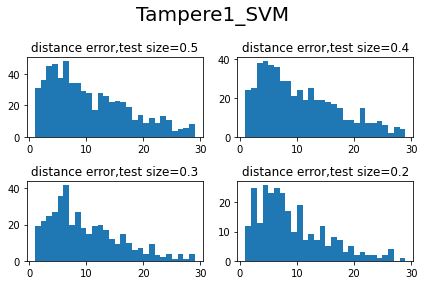

In [24]:
fig,axs=plt.subplots(2,2)

axs[0,0].hist(dis[4],bins=[i for i in range(1,30)])
#plt.xlabel('Distance')
#plt.ylabel('Number of data points')
axs[0,0].set_title('distance error,test size=0.5')

axs[0,1].hist(dis[3],bins=[i for i in range(1,30)])
#plt.xlabel('Distance')
#plt.ylabel('Number of data points')
axs[0,1].set_title('distance error,test size=0.4')

axs[1,0].hist(dis[2],bins=[i for i in range(1,30)])
#plt.xlabel('Distance')
#plt.ylabel('Number of data points')
axs[1,0].set_title('distance error,test size=0.3')

axs[1,1].hist(dis[1],bins=[i for i in range(1,30)])
#plt.xlabel('Distance')
#plt.ylabel('Number of data points')
axs[1,1].set_title('distance error,test size=0.2')

fig.suptitle('Tampere1_SVM', fontsize=20)

fig.tight_layout()

plt.savefig('SVM_Tampere1.eps',format='eps',dpi=600)

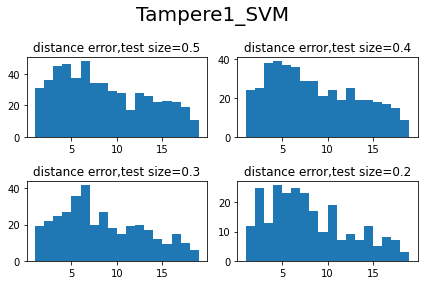

In [25]:
fig,axs=plt.subplots(2,2)


axs[0,0].hist(dis[4],bins=[i for i in range(1,20)])
#plt.xlabel('Distance')
#plt.ylabel('Number of data points')
axs[0,0].set_title('distance error,test size=0.5')

axs[0,1].hist(dis[3],bins=[i for i in range(1,20)])
#plt.xlabel('Distance')
#plt.ylabel('Number of data points')
axs[0,1].set_title('distance error,test size=0.4')

axs[1,0].hist(dis[2],bins=[i for i in range(1,20)])
#plt.xlabel('Distance')
#plt.ylabel('Number of data points')
axs[1,0].set_title('distance error,test size=0.3')

axs[1,1].hist(dis[1],bins=[i for i in range(1,20)])
#plt.xlabel('Distance')
#plt.ylabel('Number of data points')
axs[1,1].set_title('distance error,test size=0.2')

fig.suptitle('Tampere1_SVM', fontsize=20)

fig.tight_layout()

plt.savefig('SVM_Tampere1_20range.eps',format='eps',dpi=600)

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

r2 = r2_score(y_test,y_pred)
print('r2 score for the model is', r2)

mae=mean_absolute_error(y_pred[:,-1],y_test['FLOOR'])
print('Mean Absolute Error for the model is', mae)

cross_validation_score =cross_val_score(estimator=multi_op_reg,X=x_train,y=y_train,cv=10)
print('cross_validation_score:{:.2f}%'.format(cross_validation_score.mean()*100))
print('Standard deviation:{:.2f}%'.format(cross_validation_score.std()*100))


r2 score for the model is 0.8522619191885318
Mean Absolute Error for the model is 0.17128844384065153
cross_validation_score:84.16%
Standard deviation:1.76%


In [7]:
comparison2=pd.DataFrame({'longitude':y_test['LONGITUDE'],'predicted':y_pred[:,-3]})
comparison2

,longitude,predicted
563,-80.5,-63.630085
746,-56.5,-50.837015
436,-76.5,-72.033921
1044,-5.5,-14.107683
1244,-23.5,-29.222015
...,...,...
553,-24.5,-29.018131
77,-55.5,-55.011589
863,-14.5,-19.778359
884,-7.5,-11.327811


In [8]:
comparison3=pd.DataFrame({'latitude':y_test['LATITUDE'],'predicted':y_pred[:,-2]})
comparison3

,latitude,predicted
563,-8.5,0.205888
746,5.5,6.574972
436,-0.5,8.029819
1044,-12.5,-9.967720
1244,-11.5,-2.373775
...,...,...
553,-3.5,1.206858
77,7.5,7.555884
863,6.5,9.224097
884,19.5,19.106407


In [9]:
comparison1=pd.DataFrame({'y_pred':y_pred[:,-1],'y_test':y_test['FLOOR']})
comparison1

,y_pred,y_test
563,0.004402,0.0
746,1.067143,1.0
436,-0.478198,0.0
1044,0.931058,1.0
1244,1.008345,1.0
...,...,...
553,0.184016,0.0
77,-0.266359,0.0
863,1.039175,1.0
884,0.703277,1.0


In [10]:
list(y_pred[:,-1]).count(0.0),list(y_pred[:,-1]).count(1.0),list(y_pred[:,-1]).count(2.0),list(y_pred[:,-1]).count(3.0)

(0, 0, 0, 0)

In [11]:
list(y_test['FLOOR']).count(0.0),list(y_test['FLOOR']).count(1.0),list(y_test['FLOOR']).count(2.0),list(y_test['FLOOR']).count(3.0)

(212, 170, 35, 27)

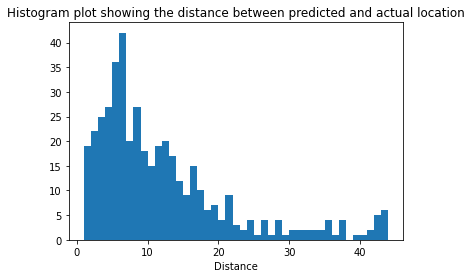

In [12]:
distance=[]
actualloc=list(zip(y_test['LATITUDE'],y_test['LONGITUDE']))
predloc=list(zip(y_pred[:,-2],y_pred[:,-3]))
#actualloc
#predloc
for i in range(len(x_test)):
    orig=actualloc[i]
    desti=predloc[i]
    distance.append(math.dist(orig,desti))
#distance
plt.hist(distance,bins=[i for i in range(1,45)])
plt.xlabel('Distance')
plt.title('Histogram plot showing the distance between predicted and actual location')
plt.show()

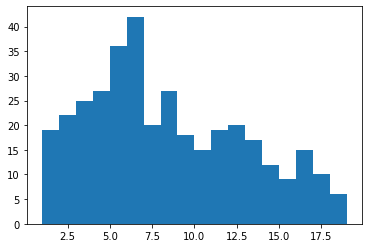

In [13]:
plt.hist(distance,bins=[i for i in range(1,20)])
plt.show()

# Tampere2

In [9]:
df2=pd.read_csv('TAMPERE2_training.csv')
m=list(df2['HEIGHT'])

for i in range(len(m)):
    if m[i] == 3.5:
        m[i]=1
    if m[i] == 7:
        m[i]=2

In [10]:
df2.shape

(583, 357)

In [11]:
df2['FLOOR']=m

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
578    7.0
579    7.0
580    7.0
581    7.0
582    7.0
Name: HEIGHT, Length: 583, dtype: float64

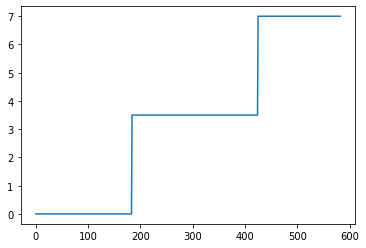

In [12]:
plt.plot(df2['HEIGHT'])   
df2.pop('HEIGHT')

In [13]:
#dis1={}

In [14]:
#plt.plot(df2['FLOOR'])             

y=df2.iloc[:,-3:-1]
x=df2.iloc[:,:-3]
#x
#y

In [15]:
y

,LONGITUDE,LATITUDE
0,2.5,-3.5
1,3.5,-10.5
2,3.5,-15.5
3,3.5,-21.5
4,3.5,-28.5
...,...,...
578,-99.5,21.5
579,-105.5,22.5
580,-106.5,26.5
581,-105.5,34.5


In [16]:
multi_op_reg = MultiOutputRegressor(svr)  

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

multi_op_reg.fit(x_train,y_train)
y_pred=multi_op_reg.predict(x_test)

In [17]:
distance=[]
actualloc=list(zip(y_test['LATITUDE'],y_test['LONGITUDE']))
predloc=list(zip(y_pred[:,-1],y_pred[:,-2]))
#actualloc
#predloc
for i in range(len(x_test)):
    orig=actualloc[i]
    desti=predloc[i]
    distance.append(math.dist(orig,desti))
#distance

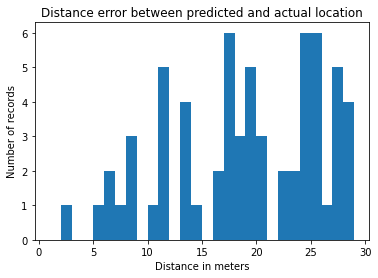

In [18]:
plt.hist(distance,bins=[i for i in range(1,30)])
plt.xlabel('Distance in meters')
plt.title('Distance error between predicted and actual location')
plt.ylabel('Number of records')

plt.savefig('svm_t2.eps',dpi=400)

In [19]:
count=0
for i in range(len(distance)):
    if distance[i]<=10:
        count+=1
print(count,len(distance))

8 117


In [20]:
8/117

0.06837606837606838

In [51]:
dis1[4]=distance[:]

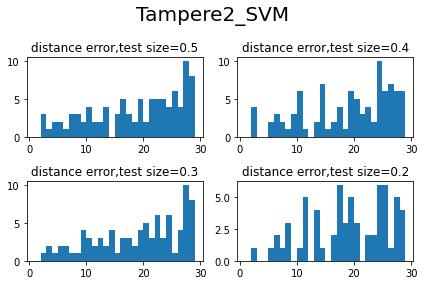

In [52]:
fig,axs=plt.subplots(2,2)

axs[0,0].hist(dis1[4],bins=[i for i in range(1,30)])
#plt.xlabel('Distance')
#plt.ylabel('Number of data points')
axs[0,0].set_title('distance error,test size=0.5')

axs[0,1].hist(dis1[3],bins=[i for i in range(1,30)])
#plt.xlabel('Distance')
#plt.ylabel('Number of data points')
axs[0,1].set_title('distance error,test size=0.4')

axs[1,0].hist(dis1[2],bins=[i for i in range(1,30)])
#plt.xlabel('Distance')
#plt.ylabel('Number of data points')
axs[1,0].set_title('distance error,test size=0.3')

axs[1,1].hist(dis1[1],bins=[i for i in range(1,30)])
#plt.xlabel('Distance')
#plt.ylabel('Number of data points')
axs[1,1].set_title('distance error,test size=0.2')

fig.suptitle('Tampere2_SVM', fontsize=20)

fig.tight_layout()

plt.savefig('SVM_Tampere2.eps',format='eps',dpi=600)

In [54]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

r2 = r2_score(y_test,y_pred)
print('r2 score for the model is', r2)

mae=mean_absolute_error(y_pred[:,-1],y_test['FLOOR'])
print('Mean Absolute Error for the model is', mae)

cross_validation_score =cross_val_score(estimator=multi_op_reg,X=x_train,y=y_train,cv=10)
print('cross_validation_score:{:.2f}%'.format(cross_validation_score.mean()*100))
print('Standard deviation:{:.2f}%'.format(cross_validation_score.std()*100))


r2 score for the model is 0.7619039447585981
Mean Absolute Error for the model is 0.08695133205570618
cross_validation_score:73.43%
Standard deviation:1.87%


In [21]:
list(y_pred[:,-1]).count(0.0),list(y_pred[:,-1]).count(1.0),list(y_pred[:,-1]).count(2.0)

(0, 0, 0)

In [22]:
list(y_test['FLOOR']).count(0.0),list(y_test['FLOOR']).count(1.0),list(y_test['FLOOR']).count(2.0)

(50, 74, 51)

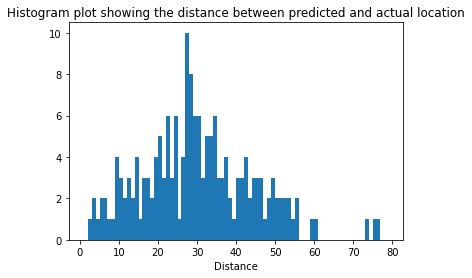

In [27]:
distance=[]
actualloc=list(zip(y_test['LATITUDE'],y_test['LONGITUDE']))
predloc=list(zip(y_pred[:,-2],y_pred[:,-3]))
#actualloc
#predloc
for i in range(len(x_test)):
    orig=actualloc[i]
    desti=predloc[i]
    distance.append(math.dist(orig,desti))
#distance
plt.hist(distance,bins=[i for i in range(1,80)])
plt.xlabel('Distance')
plt.title('Histogram plot showing the distance between predicted and actual location')
plt.show()

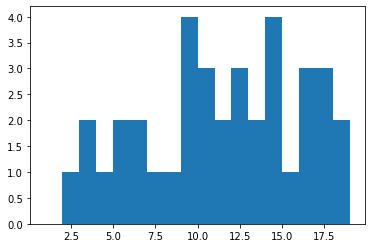

In [24]:
plt.hist(distance,bins=[i for i in range(1,20)])
plt.show()